# Density 

In [1]:
# Graphics
%matplotlib inline
import matplotlib.pyplot as plt
import contextily
# Analysis
import geopandas as gpd
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
import numpy as np
import contextily as ctx
import mapclassify

import folium

In [2]:
# Reading data from the shapefile 
merida = gpd.read_file("merida_kanasing_ageb_censo_data/merida_kanasing_ageb_censo_data.shp")
merida = merida[['CVEGEO', 'POBTOT', 'geometry']]
merida

,CVEGEO,POBTOT,geometry
0,3105000010027,21,"POLYGON ((-9981448.233 2402584.366, -9981444.5..."
1,3105000010031,253,"POLYGON ((-9965919.566 2390554.093, -9966007.0..."
2,3105000010120,1444,"POLYGON ((-9973428.542 2392332.531, -9973426.9..."
3,3105000010154,186,"POLYGON ((-9986022.068 2384222.245, -9986019.5..."
4,3105000010169,1580,"POLYGON ((-9975818.495 2391691.959, -9975809.3..."
...,...,...,...
588,3104100010846,2649,"POLYGON ((-9969326.300 2389206.019, -9969288.7..."
589,3104100010850,1089,"POLYGON ((-9969914.602 2387471.674, -9969980.1..."
590,3104100010865,1971,"POLYGON ((-9969746.204 2387367.949, -9969861.7..."
591,310410001087A,495,"POLYGON ((-9973646.930 2381847.370, -9973651.3..."


In [3]:
merida['POBTOT'].sum()

1097152

In [4]:
# Reprojecting to projected coordinate system 
merida = merida.to_crs(epsg=4485)

In [5]:
merida

,CVEGEO,POBTOT,geometry
0,3105000010027,21,"POLYGON ((2754849.653 2488201.053, 2754860.000..."
1,3105000010031,253,"POLYGON ((2771776.890 2478590.322, 2771690.909..."
2,3105000010120,1444,"POLYGON ((2764143.656 2479289.504, 2764145.335..."
3,3105000010154,186,"POLYGON ((2752865.731 2469623.554, 2752868.219..."
4,3105000010169,1580,"POLYGON ((2761880.766 2478332.690, 2761889.991..."
...,...,...,...
588,3104100010846,2649,"POLYGON ((2768610.054 2476799.106, 2768648.225..."
589,3104100010850,1089,"POLYGON ((2768269.766 2475020.798, 2768207.010..."
590,3104100010865,1971,"POLYGON ((2768449.771 2474942.611, 2768338.581..."
591,310410001087A,495,"POLYGON ((2765368.315 2469001.620, 2765374.227..."


In [6]:
# Create a new column and calculate the areas of the sectors
print(merida.geometry.area)

0      193766.758498
1      157205.277026
2      368451.299357
3      547488.520235
4      987275.032911
           ...      
588    480594.817431
589    397267.138180
590    449835.326565
591    199797.395643
592    460536.946536
Length: 593, dtype: float64


In [7]:
# El area de merida es de 227.14km^2 de kanasin 102.15km^2
print("Area en km de merida y kanasin:",((merida.geometry.area).sum())/10**6)

Area en km de merida y kanasin: 328.0682493394951


In [8]:
# Are de mérida & kanasin en metros
print("Area en km de merida y kanasin:",((merida.geometry.area).sum()))

Area en km de merida y kanasin: 328068249.33949506


In [9]:
merida['area'] = merida.geometry.area

In [10]:
# Create a population density column
merida['pop_den'] = merida['POBTOT']/((merida['area']/10**4))
merida.head()

,CVEGEO,POBTOT,geometry,area,pop_den
0,3105000010027,21,"POLYGON ((2754849.653 2488201.053, 2754860.000...",193766.758498,1.083777
1,3105000010031,253,"POLYGON ((2771776.890 2478590.322, 2771690.909...",157205.277026,16.093607
2,3105000010120,1444,"POLYGON ((2764143.656 2479289.504, 2764145.335...",368451.299357,39.191068
3,3105000010154,186,"POLYGON ((2752865.731 2469623.554, 2752868.219...",547488.520235,3.397332
4,3105000010169,1580,"POLYGON ((2761880.766 2478332.690, 2761889.991...",987275.032911,16.003646


In [11]:
merida['pop_den_inv'] = (merida['area']/10**4)/merida['POBTOT']
merida.head()

,CVEGEO,POBTOT,geometry,area,pop_den,pop_den_inv
0,3105000010027,21,"POLYGON ((2754849.653 2488201.053, 2754860.000...",193766.758498,1.083777,0.922699
1,3105000010031,253,"POLYGON ((2771776.890 2478590.322, 2771690.909...",157205.277026,16.093607,0.062136
2,3105000010120,1444,"POLYGON ((2764143.656 2479289.504, 2764145.335...",368451.299357,39.191068,0.025516
3,3105000010154,186,"POLYGON ((2752865.731 2469623.554, 2752868.219...",547488.520235,3.397332,0.294349
4,3105000010169,1580,"POLYGON ((2761880.766 2478332.690, 2761889.991...",987275.032911,16.003646,0.062486


In [12]:
mxs = merida.sort_values('pop_den_inv')
mxs

,CVEGEO,POBTOT,geometry,area,pop_den,pop_den_inv
477,310500001701A,2128,"POLYGON ((2757808.764 2466496.566, 2757812.424...",1.343557e+05,158.385496,0.006314
245,3105000014142,1609,"POLYGON ((2766967.102 2475333.272, 2766961.935...",1.090825e+05,147.502999,0.006780
246,3105000014157,1519,"POLYGON ((2767152.123 2475476.006, 2767150.705...",1.043750e+05,145.533003,0.006871
149,3105000012907,5184,"POLYGON ((2765826.864 2473461.779, 2765918.074...",3.789428e+05,136.801651,0.007310
260,3105000014301,455,"POLYGON ((2755217.194 2475402.128, 2755087.872...",3.670242e+04,123.970026,0.008066
...,...,...,...,...,...,...
342,3105000015386,3,"POLYGON ((2756424.581 2469707.228, 2756298.443...",1.020811e+06,0.029388,34.027020
411,3105000016204,0,"POLYGON ((2763060.257 2467695.270, 2763069.116...",2.421127e+04,0.000000,inf
572,3104100010672,0,"POLYGON ((2767880.046 2469358.751, 2767784.218...",5.302332e+03,0.000000,inf
54,310500001085A,0,"POLYGON ((2753917.714 2470036.852, 2753823.136...",1.094909e+05,0.000000,inf


In [13]:
merida = merida.drop([54, 411, 413, 572],axis=0)

In [14]:
merida.to_file("dash2020density.shp")

In [15]:
mxs = merida.sort_values('pop_den')
mxs

,CVEGEO,POBTOT,geometry,area,pop_den,pop_den_inv
342,3105000015386,3,"POLYGON ((2756424.581 2469707.228, 2756298.443...",1.020811e+06,0.029388,34.027020
304,3105000014937,22,"POLYGON ((2756316.807 2479511.310, 2756314.377...",1.562845e+06,0.140769,7.103840
343,3105000015390,33,"POLYGON ((2758172.279 2471425.002, 2758163.958...",1.517133e+06,0.217516,4.597373
392,3105000015992,24,"POLYGON ((2753357.943 2472166.950, 2753258.990...",9.739587e+05,0.246417,4.058161
515,3105000933820,5,"POLYGON ((2756930.195 2490134.243, 2756951.906...",1.115356e+05,0.448287,2.230712
...,...,...,...,...,...,...
260,3105000014301,455,"POLYGON ((2755217.194 2475402.128, 2755087.872...",3.670242e+04,123.970026,0.008066
149,3105000012907,5184,"POLYGON ((2765826.864 2473461.779, 2765918.074...",3.789428e+05,136.801651,0.007310
246,3105000014157,1519,"POLYGON ((2767152.123 2475476.006, 2767150.705...",1.043750e+05,145.533003,0.006871
245,3105000014142,1609,"POLYGON ((2766967.102 2475333.272, 2766961.935...",1.090825e+05,147.502999,0.006780


In [16]:
(merida['pop_den_inv'].sum())

89.36554671258614

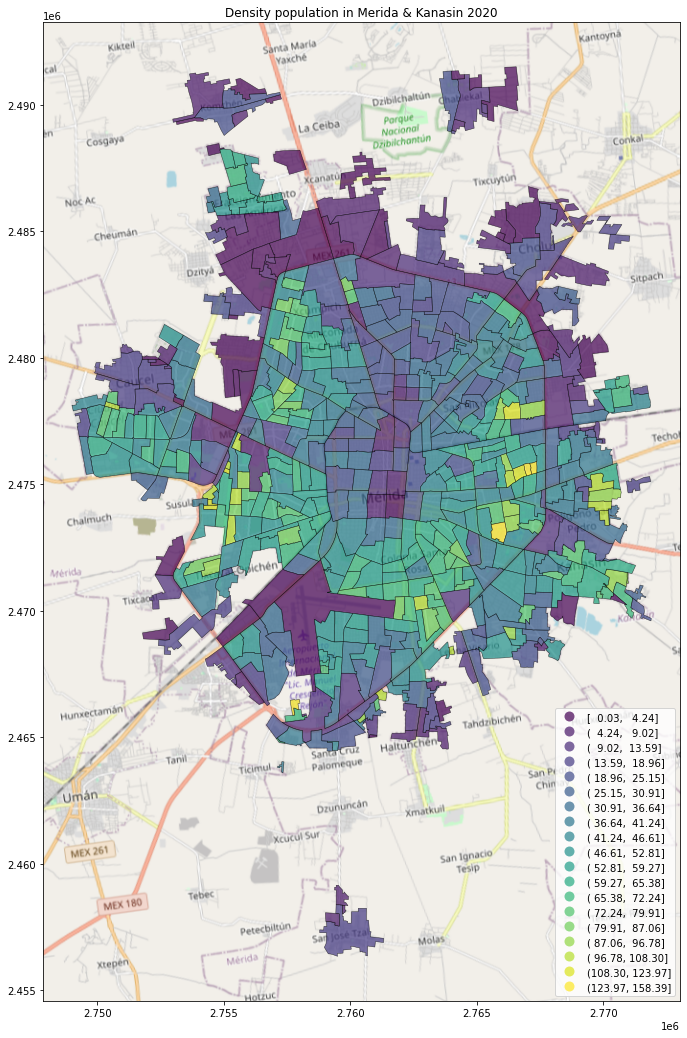

In [17]:
# Plotting 
f, ax = plt.subplots(1, figsize=(18, 18))


merida.plot(ax=ax, column = 'pop_den', cmap = 'viridis', scheme='fisherjenks', legend = True, k=19,
        edgecolor='black',
            legend_kwds={"loc": 4},
        linewidth=0.5, 
        alpha=0.7)
contextily.add_basemap(ax, 
                        crs=merida.crs,
                       url=ctx.tile_providers.OSM_A
                      )
ax.set_title('Density population in Merida & Kanasin 2020')

plt.savefig('population_merida&Kanasin_density2020.jpg')

In [18]:
mxs = merida.sort_values('pop_den_inv')
mxs

,CVEGEO,POBTOT,geometry,area,pop_den,pop_den_inv
477,310500001701A,2128,"POLYGON ((2757808.764 2466496.566, 2757812.424...",1.343557e+05,158.385496,0.006314
245,3105000014142,1609,"POLYGON ((2766967.102 2475333.272, 2766961.935...",1.090825e+05,147.502999,0.006780
246,3105000014157,1519,"POLYGON ((2767152.123 2475476.006, 2767150.705...",1.043750e+05,145.533003,0.006871
149,3105000012907,5184,"POLYGON ((2765826.864 2473461.779, 2765918.074...",3.789428e+05,136.801651,0.007310
260,3105000014301,455,"POLYGON ((2755217.194 2475402.128, 2755087.872...",3.670242e+04,123.970026,0.008066
...,...,...,...,...,...,...
515,3105000933820,5,"POLYGON ((2756930.195 2490134.243, 2756951.906...",1.115356e+05,0.448287,2.230712
392,3105000015992,24,"POLYGON ((2753357.943 2472166.950, 2753258.990...",9.739587e+05,0.246417,4.058161
343,3105000015390,33,"POLYGON ((2758172.279 2471425.002, 2758163.958...",1.517133e+06,0.217516,4.597373
304,3105000014937,22,"POLYGON ((2756316.807 2479511.310, 2756314.377...",1.562845e+06,0.140769,7.103840
